In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


Column names in the dataset: Index(['Patient ID', 'Sex', 'Age', 'Grade', 'Histological type', 'MSKCC type',
       'Site of primary STS', 'Status (NED, AWD, D)', 'Treatment'],
      dtype='object')
Checking for missing values:
 Patient ID              0
Sex                     0
Age                     0
Grade                   0
Histological type       0
MSKCC type              0
Site of primary STS     0
Status (NED, AWD, D)    0
Treatment               0
dtype: int64
Columns after handling missing values: Index(['Patient ID', 'Sex', 'Age', 'Grade', 'Histological type', 'MSKCC type',
       'Site of primary STS', 'Status (NED, AWD, D)', 'Treatment'],
      dtype='object')
Confusion Matrix:
 [[48  0  3]
 [17  0  1]
 [25  0  6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.94      0.68        51
           1       0.00      0.00      0.00        18
           2       0.60      0.19      0.29        31

    accuracy      

C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

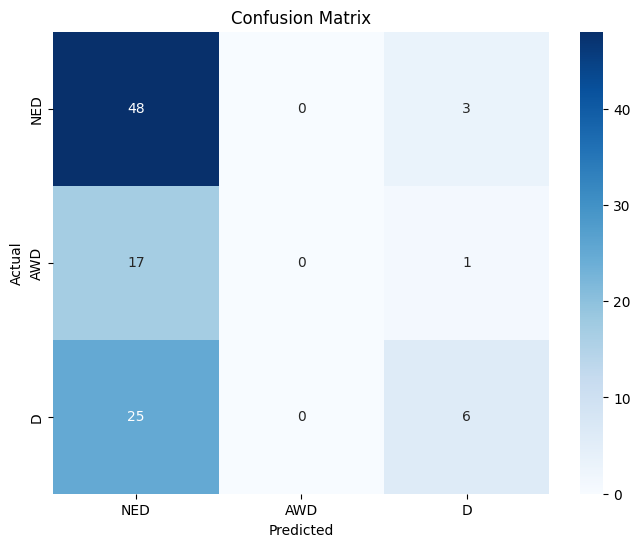

In [2]:
# Step 1: Load the dataset
df = pd.read_csv("bone_tumor_dataset.csv")  # Replace with your actual dataset path

# Step 2: Check the column names
print("Column names in the dataset:", df.columns)

# Step 3: Data Preprocessing
# Check for missing values
print("Checking for missing values:\n", df.isnull().sum())


# Handle missing values (only for numeric columns)
numeric_columns = df.select_dtypes(include=['number']).columns  # Select only numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())  # Replace missing values

# Check column names again
print("Columns after handling missing values:", df.columns)

# Encode 'Status (NED, AWD, D)' column
df['Status (NED, AWD, D)'] = df['Status (NED, AWD, D)'].map({'NED': 0, 'AWD': 1, 'D': 2})

# Step 4: Split dataset
X = df.drop(columns=['Status (NED, AWD, D)'])  # Features
y = df['Status (NED, AWD, D)']  # Target

# Step 5: Keep only numeric columns
X = X.select_dtypes(include=[np.number])

# Step 6: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = model.predict(X_test)

# Step 10: Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 11: Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NED', 'AWD', 'D'], yticklabels=['NED', 'AWD', 'D'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
